In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

## The damped simple pendulum

The equation of motion for a simple damped pendulum is:

$$\ddot{\theta}(t)+\frac{b}{m}\dot{\theta}(t)+\frac{g}{l}\theta(t)=0$$

Let the vector $\mathbf{y}=[\dot{\theta},\theta]$, then the equation can be written as

$$\frac{d\mathbf{y}}{dt}=\begin{bmatrix} \ddot{\theta} \\ \dot{\theta} \end{bmatrix}=\begin{bmatrix} -\frac{b}{m}\dot{\theta}-\frac{g}{l}\sin{\theta} \\ \dot{\theta} \end{bmatrix}$$

This can be solved using the SciPy ```solve_ivp``` function


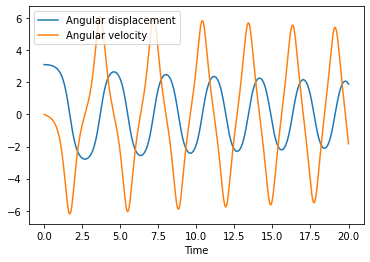

In [3]:
# The ODE
m = 1
b = 0.02
l = 1
g = 9.81
def pendulum_motion(t,y):
    return [-b*y[0]/m-g*np.sin(y[1])/l, y[0]]

# Initial conditions
theta_0 = 3.1
thetadot_0 = 0
y_0 = [thetadot_0, theta_0]

t_span = [0,20]
N_t=10000
t = np.linspace(t_span[0], t_span[1], N_t)

# Solution
sol1 = solve_ivp(pendulum_motion, t_span, y_0, t_eval=t)
theta = sol1.y[1]
theta_dot = sol1.y[0]

# Plot
plt.plot(t,theta,label="Angular displacement")
plt.plot(t,theta_dot,label="Angular velocity")
plt.legend()
plt.xlabel("Time")
plt.show()

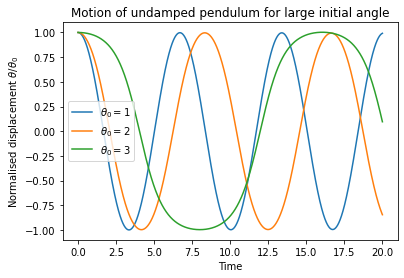

In [19]:
# The ODE
m = 1
b = 0
l = 10
g = 10
def pendulum_motion(t,y):
    return [-b*y[0]/m-g*np.sin(y[1])/l, y[0]]

# Initial conditions
theta_0 = [1,2,3]
thetadot_0 = 0

t_span = [0,20]
N_t = 10000
t = np.linspace(t_span[0], t_span[1], N_t)

for i in theta_0:
    y_0 = [thetadot_0, i]

    sol1 = solve_ivp(pendulum_motion, t_span, y_0, t_eval=t)
    theta = sol1.y[1]

    plt.plot(t,theta/i,label=r'$\theta_0=$'+str(i))
plt.legend()
plt.xlabel("Time")
plt.ylabel(r'Normalised displacement $\theta/\theta_0$')
plt.title('Motion of undamped pendulum for large initial angle')
plt.savefig('Large displacements.pdf', dpi=400)
plt.show()